In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the necessary librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings  
warnings.filterwarnings('ignore')

In [ ]:
#import the train file and test file
df_train = pd.read_csv('/content/drive/MyDrive/Datacamp/flights_train.csv',decimal=',')
df_test = pd.read_csv('/content/drive/MyDrive/Datacamp/flights_Xtest.csv',decimal=',')
df_train.head()

,flight_date,from,to,avg_weeks,target,std_weeks
0,2012-06-19,ORD,DFW,12.875,12.3312962231,9.81264711881
1,2012-09-10,LAS,DEN,14.2857142857,10.7751815054,9.46673373551
2,2012-10-05,DEN,LAX,10.8636363636,11.0831767533,9.03588325219
3,2011-10-09,ATL,ORD,11.48,11.169267842,7.99020233369
4,2012-02-21,DEN,SFO,11.45,11.2693637331,9.51715901882


In [ ]:
df_train.dtypes

flight_date    object
from           object
to             object
avg_weeks      object
target         object
std_weeks      object
dtype: object

In [ ]:
#convert the features to the appropriate type
df_train['from'] = df_train['from'].astype(str)
df_train['to'] = df_train['to'].astype(str)
df_test['from'] = df_test['from'].astype(str)
df_test['to'] = df_test['to'].astype(str)
df_train['avg_weeks'] = df_train['avg_weeks'].astype(float)
df_train['std_weeks'] = df_train['std_weeks'].astype(float)
df_test['avg_weeks'] = df_test['avg_weeks'].astype(float)
df_test['std_weeks'] = df_test['std_weeks'].astype(float)
df_train['target'] = df_train['target'].astype(float)

Skewness Co-efficient: -0.153


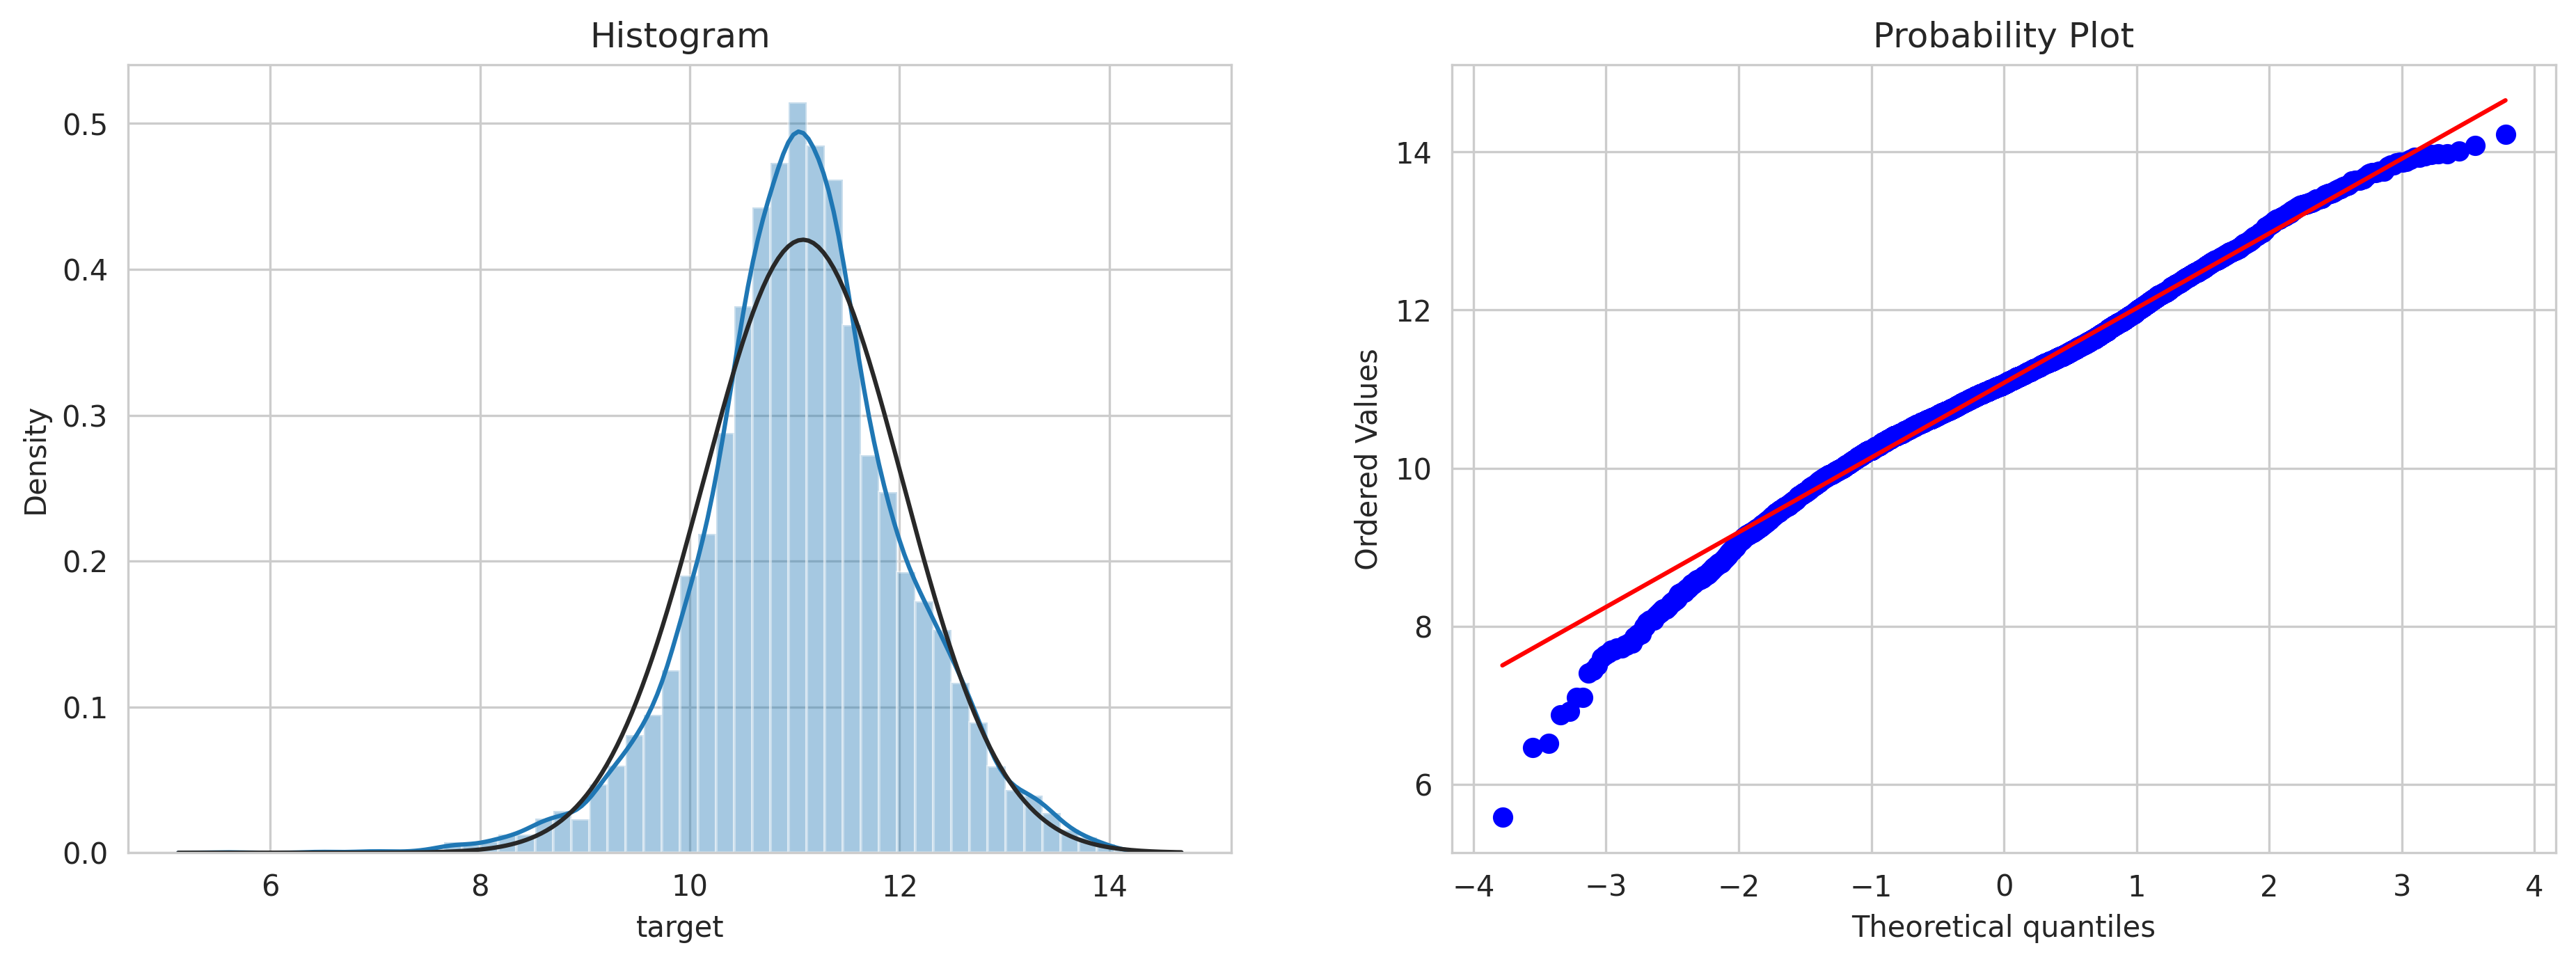

In [ ]:
#Discovering the distribution of our target variable and its skewness
print(f"Skewness Co-efficient: {round(df_train.target.skew(), 3)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

##### HISTOGRAM #####
from scipy import stats
sns.distplot(df_train['target'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

##### PROBABILITY / QQ PLOT #####
stats.probplot(df_train['target'], plot=ax2)

plt.show()

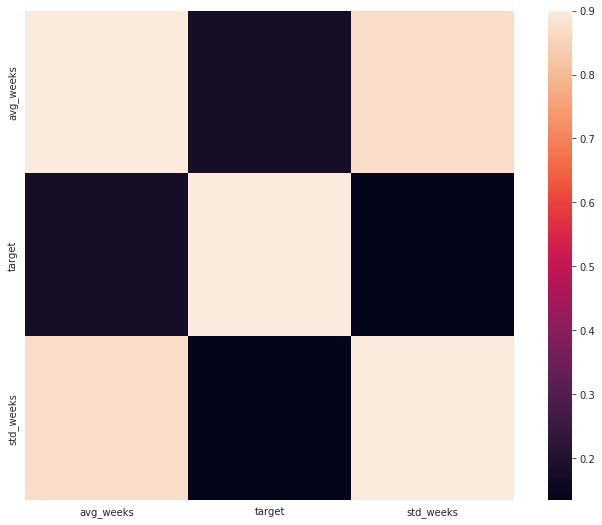

In [ ]:
#calculating the pearson correlation between the variables
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
#checking the missing values
df_train.isna().sum()

flight_date    0
from           0
to             0
avg_weeks      0
target         0
std_weeks      0
dtype: int64

In [ ]:
#function that shows the distribution of a numerical variable and the scatterplot with the target variable and also its boxplot
def plot_numeric_features(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), dpi=110)

    sns.distplot(df_train[feature], ax=ax1)
    sns.scatterplot(df_train[feature], df_train["target"], ax=ax2)
    sns.boxplot(df_train[feature], ax=ax3, orient='v', width=0.2)

    print("Skewness Coefficient of target is %.2f" %df_train[feature].skew())
    ax1.set_yticks([])
    
    return plt

Skewness Coefficient of target is 0.26


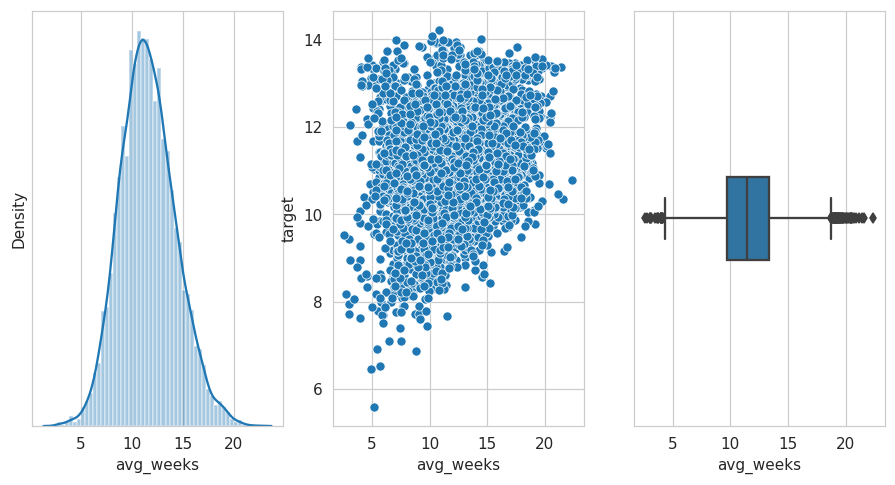

Skewness Coefficient of target is 0.04


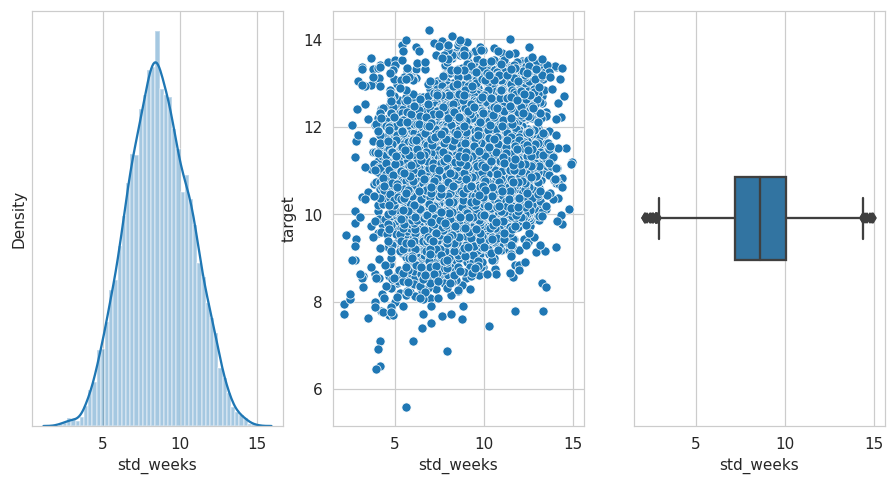

In [ ]:
plot_numeric_features("avg_weeks").show()
plot_numeric_features("std_weeks").show()

In [ ]:
df_train['from'].value_counts()

ORD    1062
ATL     975
LAX     744
SFO     691
DFW     635
DEN     632
BOS     495
LGA     460
LAS     449
EWR     413
JFK     382
PHL     360
SEA     284
MSP     239
MIA     232
DTW     232
MCO     191
CLT     150
IAH     137
PHX     133
Name: from, dtype: int64

In [ ]:
df_train['to'].value_counts()

ORD    1083
ATL    1009
LAX     795
SFO     690
DEN     622
BOS     579
DFW     572
LGA     487
LAS     426
EWR     415
PHL     336
MCO     305
JFK     288
SEA     276
MSP     210
MIA     209
DTW     197
IAH     134
PHX     134
CLT     129
Name: to, dtype: int64

In [ ]:
#convert flight fate to the proper format
import datetime
df_train['flight_date'] = pd.to_datetime(df_train['flight_date'],format='%Y-%m-%d', errors='ignore')
df_test['flight_date'] = pd.to_datetime(df_test['flight_date'],format='%Y-%m-%d', errors='ignore')

In [ ]:
df_train.dtypes

flight_date    datetime64[ns]
from                   object
to                     object
avg_weeks             float64
target                float64
std_weeks             float64
dtype: object

In [ ]:
print("Unique Values in `Flight Date` => {}".format(np.sort(df_train.flight_date.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `Flight Date` => ['2011-09-01' '2011-09-02' '2011-09-03' '2011-09-04' '2011-09-05'
 '2011-09-06' '2011-09-07' '2011-09-08' '2011-09-09' '2011-09-10'
 '2011-09-11' '2011-09-12' '2011-09-13' '2011-09-14' '2011-09-15'
 '2011-09-16' '2011-09-17' '2011-09-18' '2011-09-19' '2011-09-20'
 '2011-09-21' '2011-09-22' '2011-09-23' '2011-09-24' '2011-09-25'
 '2011-09-26' '2011-09-27' '2011-09-28' '2011-09-29' '2011-09-30'
 '2011-10-01' '2011-10-02' '2011-10-03' '2011-10-04' '2011-10-05'
 '2011-10-06' '2011-10-07' '2011-10-08' '2011-10-09' '2011-10-10'
 '2011-10-11' '2011-10-12' '2011-10-13' '2011-10-14' '2011-10-15'
 '2011-10-16' '2011-10-17' '2011-10-18' '2011-10-19' '2011-10-20'
 '2011-10-21' '2011-10-22' '2011-10-23' '2011-10-24' '2011-10-25'
 '2011-10-26' '2011-10-27' '2011-10-28' '2011-10-29' '2011-10-30'
 '2011-10-31' '2011-11-01' '2011-11-02' '2011-11-03' '2011-11-04'
 '2011-11-05' '2011-11-06' '2011-11-07' '2011-11-08' '2011-11-09'
 '2011-11-10' '2011-11-11' '2011-11-12' '2

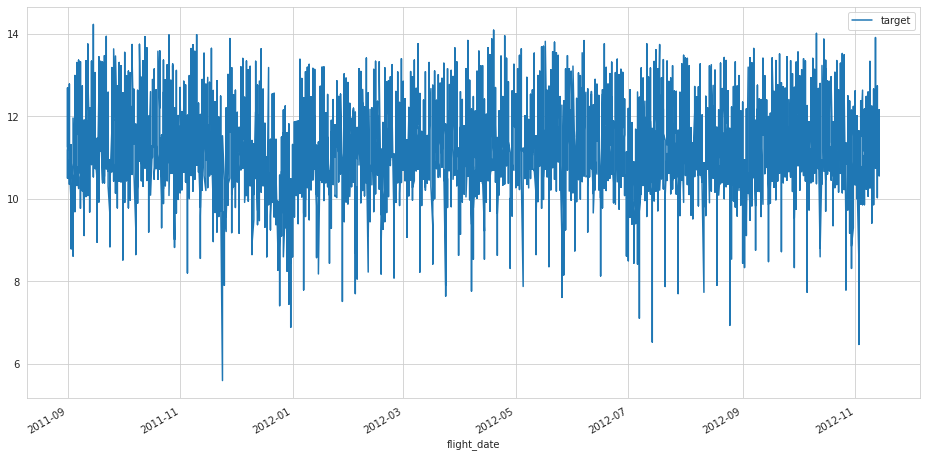

In [ ]:
#plot the target variable as a function of time 
ax = df_train.plot(x='flight_date', y='target', figsize=(16,8))

In [ ]:
# Get Day of the Week for flight_date 
df_train['flight_date_DOW'] = df_train['flight_date'].dt.strftime("%w")
df_test['flight_date_DOW'] = df_test['flight_date'].dt.strftime("%w")

In [ ]:
# Get the month of the year for flight_date 
df_train['flight_date_month'] = df_train['flight_date'].dt.strftime("%m")
df_test['flight_date_month'] = df_test['flight_date'].dt.strftime("%m")

In [ ]:
# Get the month of the year for flight_date 
df_train['flight_date_y'] = df_train['flight_date'].dt.strftime("%Y")
df_test['flight_date_y'] = df_test['flight_date'].dt.strftime("%Y")

In [ ]:
df_train['flight_date_DOW'] = df_train['flight_date_DOW'].astype(int)
df_train['flight_date_month'] = df_train['flight_date_month'].astype(int)
df_test['flight_date_DOW'] = df_test['flight_date_DOW'].astype(int)
df_test['flight_date_month'] = df_test['flight_date_month'].astype(int)
df_train['flight_date_y'] = df_train['flight_date_y'].astype(int)
df_test['flight_date_y'] = df_test['flight_date_y'].astype(int)

In [ ]:
df_train['weekend_indi'] = 0          # Initialize the column with default value of 0
df_train.loc[df_train['flight_date_DOW'].isin([5, 6]), 'weekend_indi'] = 1  

In [ ]:
df_test['weekend_indi'] = 0          # Initialize the column with default value of 0
df_test.loc[df_test['flight_date_DOW'].isin([5, 6]), 'weekend_indi'] = 1  

0    6348
1    2548
Name: weekend_indi, dtype: int64

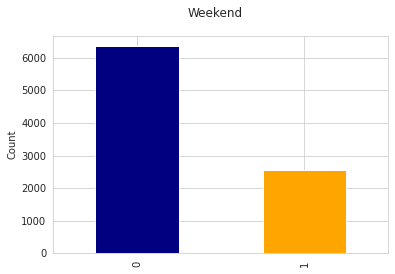

In [ ]:
counts_df = df_train['weekend_indi'].value_counts()
fig, ax = plt.subplots()
counts_df.plot(kind="bar", color=['navy', 'orange'], ax=ax)
ax.set_ylabel("Count")
fig.suptitle("Weekend")
counts_df

In [ ]:
#check the U.S holidays
import holidays
from datetime import date
for day in sorted(holidays.USA(years = 2012 ).items()):
    print(day)

(datetime.date(2012, 1, 1), "New Year's Day")
(datetime.date(2012, 1, 2), "New Year's Day (Observed)")
(datetime.date(2012, 1, 16), 'Martin Luther King Jr. Day')
(datetime.date(2012, 2, 20), "Washington's Birthday")
(datetime.date(2012, 5, 28), 'Memorial Day')
(datetime.date(2012, 7, 4), 'Independence Day')
(datetime.date(2012, 9, 3), 'Labor Day')
(datetime.date(2012, 10, 8), 'Columbus Day')
(datetime.date(2012, 11, 11), 'Veterans Day')
(datetime.date(2012, 11, 12), 'Veterans Day (Observed)')
(datetime.date(2012, 11, 22), 'Thanksgiving')
(datetime.date(2012, 12, 25), 'Christmas Day')


In [ ]:
#set a new index Holiday that contains information if the day is a holiday or not 
import holidays
from datetime import date

usa_holidays = holidays.UnitedStates()
df_train['Holiday'] = df_train['flight_date'].apply(lambda x: int(x in usa_holidays))
df_train['Holiday'].value_counts()

0    8542
1     354
Name: Holiday, dtype: int64

In [ ]:
df_test['Holiday'] = df_test['flight_date'].apply(lambda x: int(x in usa_holidays))
df_test['Holiday'].value_counts()

0    2132
1     100
Name: Holiday, dtype: int64

In [ ]:
df_train.drop(['flight_date'], axis=1, inplace=True)
df_test.drop(['flight_date'], axis=1, inplace=True)

In [ ]:
#get dummies to catogrical variables ('from' and 'to')
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [ ]:
df_train

,avg_weeks,target,std_weeks,flight_date_DOW,flight_date_month,flight_date_y,weekend_indi,Holiday,from_ATL,from_BOS,from_CLT,from_DEN,from_DFW,from_DTW,from_EWR,from_IAH,from_JFK,from_LAS,from_LAX,from_LGA,from_MCO,from_MIA,from_MSP,from_ORD,from_PHL,from_PHX,from_SEA,from_SFO,to_ATL,to_BOS,to_CLT,to_DEN,to_DFW,to_DTW,to_EWR,to_IAH,to_JFK,to_LAS,to_LAX,to_LGA,to_MCO,to_MIA,to_MSP,to_ORD,to_PHL,to_PHX,to_SEA,to_SFO
0,12.875000,12.331296,9.812647,2,6,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14.285714,10.775182,9.466734,1,9,2012,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.863636,11.083177,9.035883,5,10,2012,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,11.480000,11.169268,7.990202,0,10,2011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,11.450000,11.269364,9.517159,2,2,2012,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8891,11.045455,9.795363,7.791798,4,11,2011,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8892,11.000000,9.429776,7.937254,6,9,2012,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8893,9.476190,12.029971,6.903760,5,8,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8894,10.250000,9.381645,7.107261,2,7,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
target=df_train['target']
y = df_train['target']
X = df_train.drop(['target'],axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#function that fit the xgboost model with its hyperparameters
def objective(trial,data=df_train,target=target):
    
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse

In [ ]:
#optimizing xgboost hyperparameters with optuna 
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-01-14 20:41:58,314] A new study created in memory with name: no-name-ede4da25-b0d2-4441-9681-d687c7f063e7


[20:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:42:16,044] Trial 0 finished with value: 0.6138217336941394 and parameters: {'lambda': 0.036044497953297186, 'alpha': 2.72736650946446, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 159}. Best is trial 0 with value: 0.6138217336941394.


[20:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:42:32,864] Trial 1 finished with value: 0.5373451858250189 and parameters: {'lambda': 0.1526375476465135, 'alpha': 0.0016303714946442863, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 96}. Best is trial 1 with value: 0.5373451858250189.


[20:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:42:55,325] Trial 2 finished with value: 0.4506707328846891 and parameters: {'lambda': 0.694755871454651, 'alpha': 0.041287417567387304, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 29}. Best is trial 2 with value: 0.4506707328846891.


[20:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:43:11,218] Trial 3 finished with value: 0.5286901547071934 and parameters: {'lambda': 0.12018908213319147, 'alpha': 0.0012954941367588602, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 34}. Best is trial 2 with value: 0.4506707328846891.


[20:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:43:41,410] Trial 4 finished with value: 0.4663275272674984 and parameters: {'lambda': 0.003904175657430911, 'alpha': 0.7580460255756197, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.012, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 50}. Best is trial 2 with value: 0.4506707328846891.


[20:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:43:57,631] Trial 5 finished with value: 0.6170349712643416 and parameters: {'lambda': 9.811141482708413, 'alpha': 0.6453781702668637, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.016, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 247}. Best is trial 2 with value: 0.4506707328846891.


[20:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:44:19,508] Trial 6 finished with value: 0.48470752749505885 and parameters: {'lambda': 0.1035488877497625, 'alpha': 0.013118405276357768, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 123}. Best is trial 2 with value: 0.4506707328846891.


[20:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:44:34,767] Trial 7 finished with value: 0.5344757553986474 and parameters: {'lambda': 0.7720087044377155, 'alpha': 0.0014294677215613912, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 124}. Best is trial 2 with value: 0.4506707328846891.


[20:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:44:59,656] Trial 8 finished with value: 0.49379261025728355 and parameters: {'lambda': 0.0012166026774697047, 'alpha': 0.001908201581082063, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 127}. Best is trial 2 with value: 0.4506707328846891.


[20:44:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:45:15,534] Trial 9 finished with value: 0.5986524379839497 and parameters: {'lambda': 0.005581036669739598, 'alpha': 0.0014466899692734399, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.018, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 255}. Best is trial 2 with value: 0.4506707328846891.


[20:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:45:38,233] Trial 10 finished with value: 0.42665821311814767 and parameters: {'lambda': 2.777032853341338, 'alpha': 0.039967902735489405, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 6}. Best is trial 10 with value: 0.42665821311814767.


[20:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:46:13,432] Trial 11 finished with value: 0.42770809895836887 and parameters: {'lambda': 3.884137511288178, 'alpha': 0.05137628795150968, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 6}. Best is trial 10 with value: 0.42665821311814767.


[20:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:48:54,604] Trial 12 finished with value: 0.453445845035202 and parameters: {'lambda': 9.406570939054417, 'alpha': 0.09242217659671106, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 1}. Best is trial 10 with value: 0.42665821311814767.


[20:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:49:21,434] Trial 13 finished with value: 0.48260358510919404 and parameters: {'lambda': 1.869041169876719, 'alpha': 0.018536582341227716, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.009, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 70}. Best is trial 10 with value: 0.42665821311814767.


[20:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:50:09,372] Trial 14 finished with value: 0.5937557396222598 and parameters: {'lambda': 2.418951909567762, 'alpha': 0.30050782820545063, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 183}. Best is trial 10 with value: 0.42665821311814767.


[20:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:50:32,042] Trial 15 finished with value: 0.42628778071641915 and parameters: {'lambda': 2.562252973001038, 'alpha': 0.010051234722346833, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 6}. Best is trial 15 with value: 0.42628778071641915.


[20:50:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:50:49,145] Trial 16 finished with value: 0.5777982832176347 and parameters: {'lambda': 0.44484773649681203, 'alpha': 0.01074964576863692, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 299}. Best is trial 15 with value: 0.42628778071641915.


[20:50:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:51:08,573] Trial 17 finished with value: 0.5513786655832597 and parameters: {'lambda': 0.34885259343540426, 'alpha': 0.0067497493716261354, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.009, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 71}. Best is trial 15 with value: 0.42628778071641915.


[20:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:51:26,847] Trial 18 finished with value: 0.5332851475692292 and parameters: {'lambda': 0.035078134716238864, 'alpha': 8.15342336870114, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 88}. Best is trial 15 with value: 0.42628778071641915.


[20:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:51:46,696] Trial 19 finished with value: 0.5437085853776163 and parameters: {'lambda': 1.4042400504552819, 'alpha': 0.004496131882298553, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 196}. Best is trial 15 with value: 0.42628778071641915.


[20:51:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:52:08,749] Trial 20 finished with value: 0.4646322073892768 and parameters: {'lambda': 4.262291717009263, 'alpha': 0.22373592916700202, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 35}. Best is trial 15 with value: 0.42628778071641915.


[20:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:52:29,358] Trial 21 finished with value: 0.4255845701562757 and parameters: {'lambda': 4.518605153450935, 'alpha': 0.05148351596916166, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 5}. Best is trial 21 with value: 0.4255845701562757.


[20:52:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:52:49,461] Trial 22 finished with value: 0.4261773392887379 and parameters: {'lambda': 5.162623713481643, 'alpha': 0.03506827738196379, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 8}. Best is trial 21 with value: 0.4255845701562757.


[20:52:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:53:10,222] Trial 23 finished with value: 0.5284516874693691 and parameters: {'lambda': 6.2489183940357105, 'alpha': 0.025901810142372583, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 55}. Best is trial 21 with value: 0.4255845701562757.


[20:53:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:53:34,487] Trial 24 finished with value: 0.44186510386483757 and parameters: {'lambda': 1.1763987602602461, 'alpha': 0.12378753795282096, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 25}. Best is trial 21 with value: 0.4255845701562757.


[20:53:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:53:54,566] Trial 25 finished with value: 0.5134295649648564 and parameters: {'lambda': 0.3330969073288403, 'alpha': 0.005647805929572411, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 96}. Best is trial 21 with value: 0.4255845701562757.


[20:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:54:17,962] Trial 26 finished with value: 0.4890851054286627 and parameters: {'lambda': 4.737320371172801, 'alpha': 0.07596642354277817, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 56}. Best is trial 21 with value: 0.4255845701562757.


[20:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:54:35,629] Trial 27 finished with value: 0.44615312473389507 and parameters: {'lambda': 1.8489479746111348, 'alpha': 0.0036235490271379228, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 19}. Best is trial 21 with value: 0.4255845701562757.


[20:54:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:54:48,956] Trial 28 finished with value: 0.4328890639610421 and parameters: {'lambda': 0.03990464274294811, 'alpha': 0.02252329614634208, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 1}. Best is trial 21 with value: 0.4255845701562757.


[20:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:55:11,146] Trial 29 finished with value: 0.507287487114036 and parameters: {'lambda': 0.8536389620940869, 'alpha': 0.22729642711806436, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 44}. Best is trial 21 with value: 0.4255845701562757.


[20:55:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:55:29,877] Trial 30 finished with value: 0.5132780220389721 and parameters: {'lambda': 7.525396241622232, 'alpha': 1.0415825891513042, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.012, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 158}. Best is trial 21 with value: 0.4255845701562757.


[20:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:55:48,379] Trial 31 finished with value: 0.4329866345834342 and parameters: {'lambda': 3.078183748482519, 'alpha': 0.03868768051879224, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 13}. Best is trial 21 with value: 0.4255845701562757.


[20:55:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:56:05,915] Trial 32 finished with value: 0.514893614969788 and parameters: {'lambda': 2.8678185639675005, 'alpha': 0.13916569368822795, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 72}. Best is trial 21 with value: 0.4255845701562757.


[20:56:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:56:24,301] Trial 33 finished with value: 0.43774215738668837 and parameters: {'lambda': 0.22378665193884348, 'alpha': 0.009800632994472966, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 20}. Best is trial 21 with value: 0.4255845701562757.


[20:56:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:56:49,451] Trial 34 finished with value: 0.4815986663122876 and parameters: {'lambda': 1.3264338271323708, 'alpha': 0.04777577337252446, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 35}. Best is trial 21 with value: 0.4255845701562757.


[20:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:57:06,061] Trial 35 finished with value: 0.4476666968974088 and parameters: {'lambda': 0.05135060532137109, 'alpha': 0.0317504086948962, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 20}. Best is trial 21 with value: 0.4255845701562757.


[20:57:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:57:22,671] Trial 36 finished with value: 0.48164655008485047 and parameters: {'lambda': 0.5625470412077347, 'alpha': 0.05583740984200791, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.018, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 41}. Best is trial 21 with value: 0.4255845701562757.


[20:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:57:48,256] Trial 37 finished with value: 0.5233283000933117 and parameters: {'lambda': 6.588640107421441, 'alpha': 0.01968718986508421, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 17, 'random_state': 48, 'min_child_weight': 61}. Best is trial 21 with value: 0.4255845701562757.


[20:57:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:58:09,461] Trial 38 finished with value: 0.5033406899618482 and parameters: {'lambda': 0.013960796399608108, 'alpha': 0.002961333148105489, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 86}. Best is trial 21 with value: 0.4255845701562757.


[20:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:58:28,021] Trial 39 finished with value: 0.5107712941188555 and parameters: {'lambda': 0.9826009716691583, 'alpha': 0.011872946255660669, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.009, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 105}. Best is trial 21 with value: 0.4255845701562757.


[20:58:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:58:46,018] Trial 40 finished with value: 0.48447397418047966 and parameters: {'lambda': 2.155571101378985, 'alpha': 0.34228278144025176, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 31}. Best is trial 21 with value: 0.4255845701562757.


[20:58:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 20:59:24,548] Trial 41 finished with value: 0.427183620692588 and parameters: {'lambda': 4.122407380918729, 'alpha': 0.0672203148258578, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 5}. Best is trial 21 with value: 0.4255845701562757.


[20:59:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 21:00:58,316] Trial 42 finished with value: 0.4384414850279164 and parameters: {'lambda': 5.083315105590187, 'alpha': 0.07106199689548937, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 1}. Best is trial 21 with value: 0.4255845701562757.


[21:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 21:01:27,398] Trial 43 finished with value: 0.43411076751658306 and parameters: {'lambda': 3.3975055686835507, 'alpha': 0.15354284300321872, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 2020, 'min_child_weight': 14}. Best is trial 21 with value: 0.4255845701562757.


[21:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 21:01:43,225] Trial 44 finished with value: 0.5167893939760521 and parameters: {'lambda': 9.533193027689574, 'alpha': 0.029666624459473608, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.016, 'max_depth': 5, 'random_state': 48, 'min_child_weight': 49}. Best is trial 21 with value: 0.4255845701562757.


[21:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 21:02:03,019] Trial 45 finished with value: 0.442693351109764 and parameters: {'lambda': 1.7489578104755497, 'alpha': 0.019079669286552647, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 28}. Best is trial 21 with value: 0.4255845701562757.


[21:02:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 21:02:56,333] Trial 46 finished with value: 0.4836624104985099 and parameters: {'lambda': 3.5225670825061397, 'alpha': 0.007749762411207282, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 140}. Best is trial 21 with value: 0.4255845701562757.


[21:02:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 21:03:11,054] Trial 47 finished with value: 0.4270046952297599 and parameters: {'lambda': 6.469958993038813, 'alpha': 0.09787200456152252, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 12}. Best is trial 21 with value: 0.4255845701562757.


[21:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 21:03:24,754] Trial 48 finished with value: 0.4340461080785537 and parameters: {'lambda': 9.877670948741738, 'alpha': 0.5952705478606413, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 15}. Best is trial 21 with value: 0.4255845701562757.


[21:03:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-01-14 21:03:46,359] Trial 49 finished with value: 0.5083371845717475 and parameters: {'lambda': 6.306112951795095, 'alpha': 0.015109821490301096, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 178}. Best is trial 21 with value: 0.4255845701562757.


Number of finished trials: 50
Best trial: {'lambda': 4.518605153450935, 'alpha': 0.05148351596916166, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 5}


In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,0.613822,2022-01-14 20:41:58.316804,2022-01-14 20:42:16.044465,0 days 00:00:17.727661,2.727367,1.0,0.036044,0.014,13,159,24,0.4,COMPLETE
1,1,0.537345,2022-01-14 20:42:16.046314,2022-01-14 20:42:32.864382,0 days 00:00:16.818068,0.001630,0.8,0.152638,0.010,7,96,24,0.6,COMPLETE
2,2,0.450671,2022-01-14 20:42:32.866124,2022-01-14 20:42:55.325521,0 days 00:00:22.459397,0.041287,1.0,0.694756,0.008,17,29,2020,0.7,COMPLETE
3,3,0.528690,2022-01-14 20:42:55.327892,2022-01-14 20:43:11.218172,0 days 00:00:15.890280,0.001295,0.8,0.120189,0.008,5,34,24,0.5,COMPLETE
4,4,0.466328,2022-01-14 20:43:11.220002,2022-01-14 20:43:41.410534,0 days 00:00:30.190532,0.758046,0.8,0.003904,0.012,17,50,2020,1.0,COMPLETE
5,5,0.617035,2022-01-14 20:43:41.412317,2022-01-14 20:43:57.631082,0 days 00:00:16.218765,0.645378,0.4,9.811141,0.016,13,247,2020,0.6,COMPLETE
6,6,0.484708,2022-01-14 20:43:57.632879,2022-01-14 20:44:19.507750,0 days 00:00:21.874871,0.013118,0.9,0.103549,0.020,13,123,2020,1.0,COMPLETE
7,7,0.534476,2022-01-14 20:44:19.509571,2022-01-14 20:44:34.767354,0 days 00:00:15.257783,0.001429,0.9,0.772009,0.016,5,124,2020,0.7,COMPLETE
8,8,0.493793,2022-01-14 20:44:34.769149,2022-01-14 20:44:59.655607,0 days 00:00:24.886458,0.001908,0.9,0.001217,0.020,17,127,24,0.7,COMPLETE
9,9,0.598652,2022-01-14 20:44:59.657485,2022-01-14 20:45:15.534424,0 days 00:00:15.876939,0.001447,0.9,0.005581,0.018,7,255,2020,0.6,COMPLETE


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_edf(study)

In [ ]:
Best_trial= {'lambda': 0.030122615277663786, 'alpha': 0.49109871854247905, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 16,'tree_method':'gpu_hist'}

In [ ]:
xgboost = XGBRegressor(learning_rate=0.3,n_estimators=200,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_train, y_train)

[22:06:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.6, 
                                       n_estimators=1500,
                                       max_bin=100, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
gbm = lightgbm.fit(X_train, y_train)

In [ ]:
tot = ((0.5 * xgb.predict(df_test))+ (0.5*gbm.predict(df_test)))

we combine our two models to obtain a more accurate model. 

In [ ]:
x= tot
y = pd.Series(x)
print(y)
y.to_csv('test1_flight.csv',index=False)